# Lab 1

## The way i understand this assignement.
- Read the files and transfer them into variables
- Use binary classifcation for machine learning
- Plot the results

## Bonus such as estetics suchs as user input.

Since this exercise is made to evaluate me i will document my thought process and do continuous uploads.

Step 1: Read the files and store them.

    Problems faced:
- HeaderFile (width (cm), height (cm)) making it annoying.
- One format to read lines from the training data and different way to read the test_points
- Generally annoying too figure out where to strip,replace and split.

GitCommit 1 for Lab1

Step 2: Get basic plots up and develop the mean points.

    Problems faced:

- Correct Syntax is a struggle
- Initiations and plot is ugly

c:\Users\Delic\OneDrive\Skrivbord\Dekstop\Python-Henrik-Pedersen-OPA2023\venv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Delic\OneDrive\Skrivbord\Dekstop\Python-Henrik-Pedersen-OPA2023\venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Delic\OneDrive\Skrivbord\Dekstop\Python-Henrik-Pedersen-OPA2023\venv\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Delic\OneDrive\Skrivbord\Dekstop\Python-Henrik-Pedersen-OPA2023\venv\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Delic\OneDrive\Skrivbord\Dekstop\Python-Henrik-Pedersen-OPA2023\venv\lib\site-packages\nump

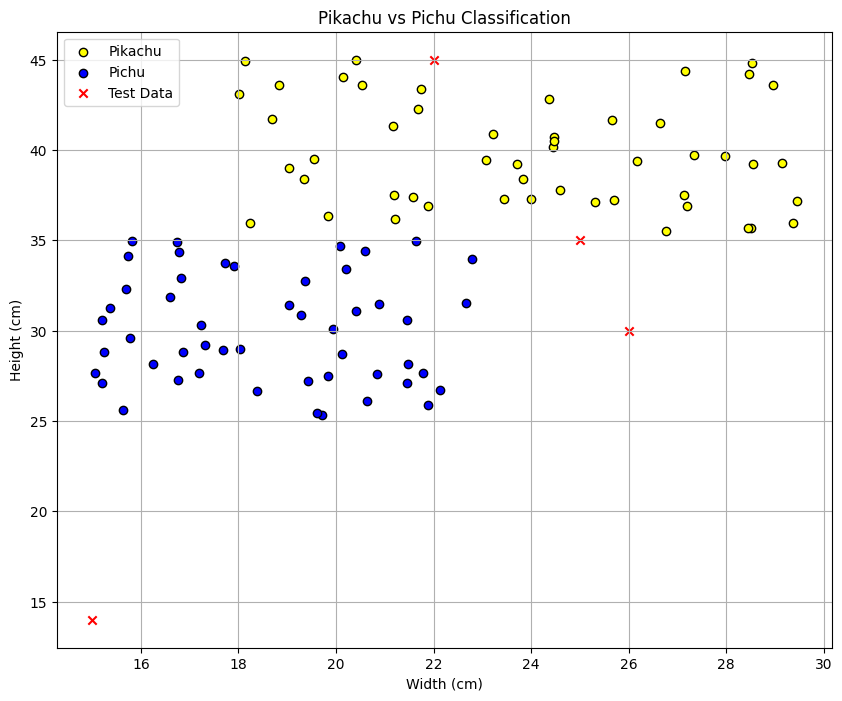

In [10]:
import matplotlib.pyplot as plt
import numpy as np

#Python data initiationlization 
Pikachu_data = []

Pichu_data = []

test_data = []

#Numpy Initilization

Pichu_array = np.array(Pichu_data)
Pikachu_array = np.array(Pikachu_data)
mean_width_height_Pichu = np.mean(Pichu_array, axis=0)
mean_width_height_Pikachu = np.mean(Pikachu_array, axis=0)
std_width_height_Pichu = np.std(Pichu_array, axis=0)
std_width_height_Pikachu = np.std(Pikachu_array, axis=0)

def BinaryClassification(test_point, mean_Pichu, std_Pichu, mean_Pikachu, std_Pikachu):
    if all(test_point>mean_Pichu-std_Pichu) and all(test_point < mean_Pikachu + std_Pikachu):
        return f"Sampe with (width, height): {test_point}]Pikachu"
    else:
        return f"Sameple with (width, height): {test_point}]Pikachu"


with open("Lab1_pikachu.txt", "r") as file: 

    next(file)
    for line in file:
        width, height = line.strip().replace("(", "").replace(")", "").split(",")
        width = float(width)
        height = float(height)
        Pikachu_data.append((width, height))


with open("Lab1_pichu.txt", "r") as file: 
        next(file)
        for line in file:
            width, height = line.strip().replace("(", "").replace(")", "").split(",")
            width = float(width)
            height = float(height)
            Pichu_data.append((width,height))
    


with open("Lab1_test_points.txt", "r") as file: 
    line = file.readline()
    pairs = line.strip()[1:-1].split("), (")
    for pair in pairs:
        if pair.strip():
            width, height = pair.replace("(", "").replace(")", "").split(",")
            test_data.append((float(width), float(height)))


#for line in Pikachu_data:
#    print(line)

#print("\nPichu Data:")
#for line in Pichu_data:
#    print(line)

#print("\nTest Data:")
#for line in test_data:
#    print(line)

BinaryClassificationTestData = [BinaryClassification(
    point, mean_width_height_Pichu, std_width_height_Pichu, mean_width_height_Pikachu, std_width_height_Pikachu) for point in test_data]

BinaryClassificationTestData

#Plots 

plt.figure(figsize=(10, 8))
plt.scatter(*zip(*Pikachu_data), color="yellow",
            label="Pikachu", edgecolor="black")

plt.scatter(*zip(*Pichu_data), color="blue", label="Pichu", edgecolor="black")

#Removing this gives a clearer picture because one of the points is so far bellow, somebody needs to get that Pichu to the hospital because it is seriously malnourished or something
plt.scatter(*zip(*test_data), color="red", label="Test Data", marker="x")

plt.title("Pikachu vs Pichu Classification")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend()
plt.grid(True)
plt.show()